In [1]:
from collections import defaultdict
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
results = pd.read_csv('./mushra.csv')
results

,Unnamed: 0,Sound filename,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,005-lstm-32.wav,005-side-chain-c32-f4.wav,005-single-chain-c32-f4.wav,005-TCN-300-C.wav,...,188-single-chain-c32-f4.wav,188-TCN-300-C.wav,195-lstm-32.wav,195-side-chain-c32-f4.wav,195-single-chain-c32-f4.wav,195-TCN-300-C.wav,197-lstm-32.wav,197-side-chain-c32-f4.wav,197-single-chain-c32-f4.wav,197-TCN-300-C.wav
0,Dynamic Range Compressor Modeling - Listening ...,2023-09-06 01:50:43,No,Audio engineer,audio technica ATH-M20X,NaN,88,93,83,68,...,92,91,70,90,70,62,86,68,58,76
1,Dynamic Range Compressor Modeling - Listening ...,2023-09-05 19:04:08,No,Others,Realtek（R) Audio,NaN,90,85,85,85,...,85,85,90,87,80,85,82,87,85,80
2,Dynamic Range Compressor Modeling - Listening ...,2023-09-05 18:46:39,No,Audio researcher,beyerdynamic DT 880,NaN,100,100,100,60,...,65,90,60,65,90,65,65,60,64,65
3,Dynamic Range Compressor Modeling - Listening ...,2023-09-05 17:59:01,No,Others,EDIFIER TWS1 Pro,NaN,69,94,30,10,...,73,29,29,65,91,93,93,47,28,93
4,Dynamic Range Compressor Modeling - Listening ...,2023-09-05 17:11:31,No,Audio engineer,huawei free5i,NaN,68,22,20,96,...,82,88,74,27,74,19,16,20,64,73
5,Dynamic Range Compressor Modeling - Listening ...,2023-09-05 16:54:34,No,Audio engineer,mobile phone,NaN,45,38,40,71,...,71,79,64,61,38,43,43,34,65,56
6,Dynamic Range Compressor Modeling - Listening ...,2023-09-05 16:54:17,No,Audio researcher,Soundcore Space Q45 Headphones + onboard audio...,NaN,81,77,80,79,...,96,88,78,67,87,86,91,93,74,97
7,Dynamic Range Compressor Modeling - Listening ...,2023-09-05 16:18:38,No,Audio researcher,Sennheiser HD599,NaN,84,86,84,70,...,74,70,79,78,89,92,66,68,65,63
8,Dynamic Range Compressor Modeling - Listening ...,2023-09-05 00:39:43,No,Musician,audio-technica wired headset on a macbook pro,NaN,91,60,42,47,...,40,56,65,78,88,69,93,86,79,94
9,Dynamic Range Compressor Modeling - Listening ...,2023-09-04 08:30:02,No,Others,漫步者n2,NaN,51,71,13,29,...,28,71,66,27,74,39,11,48,31,70


In [4]:
response = {
    'ssm-c32-f4': [],
    'LSTM-32': [],
    'TCN-300-C': [],
}
piano_response = {
    'ssm-c32-f4': [],
    'LSTM-32': [],
    'TCN-300-C': [],
}
guitar_response = {
    'ssm-c32-f4': [],
    'LSTM-32': [],
    'TCN-300-C': [],
}
for column in results:
    if not isinstance(column, str):
        continue
    if 'lstm-32' in column:
        response['LSTM-32'].extend(results[column].tolist())
        if '005' in column or '094' in column or '100' in column or '188' in column:
            piano_response['LSTM-32'].extend(results[column].tolist())
        if '008' in column or '103' in column or '195' in column or '197' in column:
            guitar_response['LSTM-32'].extend(results[column].tolist())
    elif 'TCN-300-C' in column:
        response['TCN-300-C'].extend(results[column].tolist())
        if '005' in column or '094' in column or '100' in column or '188' in column:
            piano_response['TCN-300-C'].extend(results[column].tolist())
        if '008' in column or '103' in column or '195' in column or '197' in column:
            guitar_response['TCN-300-C'].extend(results[column].tolist())
    elif 'single-chain-c32-f4' in column:
        response['ssm-c32-f4'].extend(results[column].tolist())
        if '005' in column or '094' in column or '100' in column or '188' in column:
            piano_response['ssm-c32-f4'].extend(results[column].tolist())
        if '008' in column or '103' in column or '195' in column or '197' in column:
            guitar_response['ssm-c32-f4'].extend(results[column].tolist())

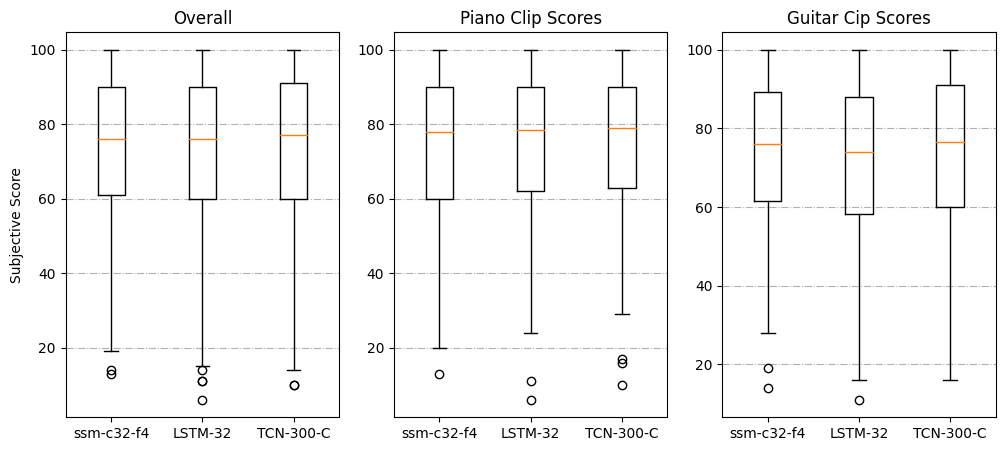

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

axs[0].boxplot(np.stack([v for k, v in response.items()], axis=1), labels=[k for k, _ in response.items()])
axs[0].set_title('Overall')
axs[0].set_ylabel('Subjective Score')
axs[0].yaxis.grid(True, linestyle='-.')

axs[1].boxplot(np.stack([v for k, v in piano_response.items()], axis=1), labels=[k for k, _ in piano_response.items()])
axs[1].set_title('Piano Clip Scores')
axs[1].yaxis.grid(True, linestyle='-.')

axs[2].boxplot(np.stack([v for k, v in guitar_response.items()], axis=1), labels=[k for k, _ in guitar_response.items()])
axs[2].set_title('Guitar Cip Scores')
axs[2].yaxis.grid(True, linestyle='-.')

fig.savefig('subjective.png')